In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
Xlist = pd.read_excel('Xlist.xlsx', header=None)
Zlist = pd.read_excel('Zlist.xlsx', header=None)
Xnlist = pd.read_excel('Xnlist.xlsx', header=None)

In [13]:
Xlist, Zlist, Xnlist = Xlist.to_numpy(), Zlist.to_numpy(), Xnlist.to_numpy()

In [14]:
a, b = Xlist.shape
a, b

(8, 14)

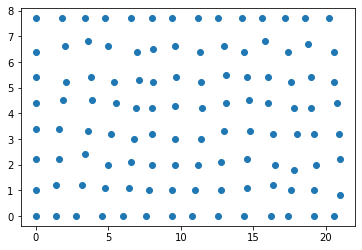

In [15]:
plt.scatter(Xlist.flatten(),Zlist.flatten())

In [16]:
Xlist

array([[ 0. ,  1.8,  3.4,  4.8,  6.6,  8. ,  9.4, 11.2, 12.6, 14.2, 15.6,
        17.2, 18.6, 20.2],
       [ 0. ,  2. ,  3.6,  5. ,  7. ,  8.1,  9.6, 11.3, 13. , 14.4, 15.8,
        17.4, 18.8, 20.6],
       [ 0. ,  2.1,  3.8,  5.4,  7.1,  8.1,  9.7, 11.4, 13.1, 14.6, 16. ,
        17.6, 19. , 20.6],
       [ 0. ,  1.9,  3.9,  5.5,  6.9,  8. ,  9.6, 11.5, 13.1, 14.7, 16. ,
        17.8, 19. , 20.8],
       [ 0. ,  1.6,  3.6,  5.2,  6.8,  8. ,  9.6, 11.4, 13. , 14.8, 16.4,
        18. , 19.2, 20.9],
       [ 0. ,  1.6,  3.4,  5. ,  6.6,  8. ,  9.6, 11.2, 12.8, 14.6, 16.5,
        17.8, 19.3, 21. ],
       [ 0. ,  1.4,  3.2,  4.8,  6.4,  7.8,  9.4, 11. , 12.8, 14.6, 16.4,
        17.6, 19.2, 21. ],
       [ 0. ,  1.4,  2.8,  4.6,  6. ,  7.6,  9.4, 10.8, 12.6, 14.4, 16.2,
        17.4, 19.2, 20.6]])

### Определение хорд

In [17]:
# l_x
arr = []
for i in range(1, a-1):
    row = []
    for j in range(1, b-1):
        z = Zlist[i, j-1] - Zlist[i, j+1]
        x = Xlist[i, j+1] - Xlist[i, j-1]
        row.append(np.sqrt(z**2 + x**2))
    arr.append(row)
l_x = np.array(arr)

In [18]:
pd.DataFrame(l_x)

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.622154,3.000000,3.423449,3.101612,2.607681,3.201562,3.400000,3.100000,2.807134,3.000000,3.001666,3.200000
1,3.800000,3.300000,3.301515,2.700000,2.601922,3.300000,3.401470,3.206244,2.901724,3.006659,3.000000,3.000000
2,3.901282,3.601389,3.014963,2.507987,2.701851,3.500000,3.501428,3.214032,2.900000,3.114482,3.006659,3.006659
3,3.601389,3.605551,3.214032,2.800000,2.800000,3.405877,3.413210,3.413210,3.401470,3.201562,2.800000,2.900000
4,3.405877,3.405877,3.214032,3.000000,3.001666,3.200000,3.201562,3.405877,3.701351,3.224903,2.800000,3.224903
5,3.206244,3.401470,3.201562,3.001666,3.001666,3.200000,3.400000,3.601389,3.605551,3.001666,2.807134,3.405877


In [29]:
# l_z
arr = []
for i in range(1, a-1):
    row = []
    for j in range(1, b-1):
        z = Zlist[i+1, j] - Zlist[i-1, j]
        x = Xlist[i+1, j] - Xlist[i-1, j]
        row.append(np.sqrt(z**2 + x**2))
    arr.append(row)
l_z = np.array(arr)

In [30]:
l_z.shape

(6, 12)

In [20]:
pd.DataFrame(l_z)

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.517936,2.334524,2.570992,2.451530,2.501999,2.319483,2.507987,2.256103,2.334524,2.334524,2.531798,2.334524
1,2.102380,2.319483,2.256103,2.202272,2.302173,2.300000,2.209072,2.202272,1.923538,2.408319,2.236068,2.507987
2,1.868154,2.109502,2.009975,2.319483,2.002498,2.402082,2.200000,2.202272,2.109502,2.236068,2.039608,2.209072
3,2.319483,2.158703,2.451530,2.121320,2.200000,2.300000,2.220360,2.319483,2.302173,2.451530,2.400000,2.220360
4,2.209072,2.137756,2.137756,1.941649,2.209072,2.009975,2.039608,2.308679,2.209072,2.000000,2.236068,2.200000
5,2.209072,2.473863,2.039608,2.184033,2.039608,2.009975,2.039608,2.109502,2.209072,2.022375,1.843909,2.002498


### Определение главных компонентов тензора деформации и интенсивности деформаций

##### Габариты недеформированной стеки:

In [21]:
delta = 1.2

In [22]:
pd.DataFrame(Xlist)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.8,3.4,4.8,6.6,8.0,9.4,11.2,12.6,14.2,15.6,17.2,18.6,20.2
1,0.0,2.0,3.6,5.0,7.0,8.1,9.6,11.3,13.0,14.4,15.8,17.4,18.8,20.6
2,0.0,2.1,3.8,5.4,7.1,8.1,9.7,11.4,13.1,14.6,16.0,17.6,19.0,20.6
3,0.0,1.9,3.9,5.5,6.9,8.0,9.6,11.5,13.1,14.7,16.0,17.8,19.0,20.8
4,0.0,1.6,3.6,5.2,6.8,8.0,9.6,11.4,13.0,14.8,16.4,18.0,19.2,20.9
5,0.0,1.6,3.4,5.0,6.6,8.0,9.6,11.2,12.8,14.6,16.5,17.8,19.3,21.0
6,0.0,1.4,3.2,4.8,6.4,7.8,9.4,11.0,12.8,14.6,16.4,17.6,19.2,21.0
7,0.0,1.4,2.8,4.6,6.0,7.6,9.4,10.8,12.6,14.4,16.2,17.4,19.2,20.6


In [27]:
# E_a
arr = []
for i in range(1, a):
    row = []
    for j in range(1, b):
        first = l_z[i-1, j-1] / (2*delta)
        second = l_x[i-1, j-1] / (2*delta)
        third = 2 * Xnlist[i,j] / Xlist[i,j]
        result = np.sqrt(
            first**2 + second**2 + third
        )
        result += np.sqrt(
            np.abs(first**2 + second**2 - third)
        )
        row.append(np.log(0.5*result))
        
    arr.append(row)
E_a = np.array(arr)

IndexError: index 12 is out of bounds for axis 1 with size 12

In [26]:
pd.DataFrame(E_a)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.528574,0.349453,0.525421,0.439502,0.304154,0.436418,0.522833,0.404264,0.336450,0.391944,0.435769,0.446408
1,0.516484,0.450036,0.448876,0.260412,0.235751,0.460199,0.474121,0.424165,0.267908,0.411550,0.374262,0.431462
2,0.486342,0.498451,0.313725,0.213516,0.158877,0.525560,0.498801,0.426282,0.315038,0.405358,0.335782,0.369745
3,0.377793,0.495681,0.457213,0.258961,0.275318,0.485875,0.478984,0.496825,0.493630,0.472135,0.358608,0.342325
4,0.334202,0.421886,0.385094,0.277750,0.348592,0.375146,0.385493,0.491580,0.549398,0.396602,0.315978,0.431484
5,0.517111,0.474045,0.347152,0.331114,0.298784,0.370650,0.440560,0.508885,0.526925,0.331460,0.208392,0.445887


In [106]:
# E_b
arr = []
for i in range(1, a-1):
    row = []
    for j in range(1, b-1):
        first = l_z[i-1, j-1] / (2*delta)
        second = l_x[i-1, j-1] / (2*delta)
        third = 2 * Xnlist[i,j] / Xlist[i,j]
        result = np.sqrt(
            first**2 + second**2 + third
        )
        result -= np.sqrt(
            np.abs(first**2 + second**2 - third)
        )
        row.append(np.log(0.5*result))
        
    arr.append(row)
E_b = np.array(arr)

In [107]:
pd.DataFrame(E_b)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.346252,-0.349453,-0.566243,-0.593653,-0.421937,-0.569950,-0.685873,-0.589667,-0.518771,-0.571737,-0.625011,-0.632994
1,-0.382953,-0.504103,-0.566659,-0.428748,-0.353534,-0.604093,-0.645971,-0.617232,-0.464023,-0.603922,-0.574932,-0.628630
2,-0.252727,-0.578494,-0.449857,-0.353278,-0.264238,-0.659091,-0.679385,-0.619348,-0.517979,-0.597730,-0.547752,-0.566913
3,0.027672,-0.495681,-0.537255,-0.384124,-0.380679,-0.619406,-0.650834,-0.682229,-0.703350,-0.689199,-0.581751,-0.549964
4,0.023861,-0.364727,-0.425916,-0.373060,-0.453953,-0.508677,-0.539644,-0.661479,-0.745513,-0.619746,-0.527948,-0.644319
5,-0.242535,-0.356262,-0.347152,-0.395653,-0.378827,-0.483128,-0.576692,-0.678785,-0.723040,-0.548525,-0.409063,-0.653526


In [108]:
# E_c
E_c = -(E_b + E_a)

In [109]:
pd.DataFrame(E_c)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.182322,1.665335e-16,4.082199e-02,0.154151,0.117783,0.133531,0.163040,0.185403,0.182322,0.179793,0.189242,0.186586
1,-0.133531,5.406722e-02,1.177830e-01,0.168335,0.117783,0.143894,0.171850,0.193066,0.196115,0.192372,0.200671,0.197168
2,-0.233615,8.004271e-02,1.361322e-01,0.139762,0.105361,0.133531,0.180584,0.193066,0.202941,0.192372,0.211970,0.197168
3,-0.405465,-1.110223e-16,8.004271e-02,0.125163,0.105361,0.133531,0.171850,0.185403,0.209721,0.217065,0.223144,0.207639
4,-0.358063,-5.715841e-02,4.082199e-02,0.095310,0.105361,0.133531,0.154151,0.169899,0.196115,0.223144,0.211970,0.212834
5,-0.274576,-1.177830e-01,-5.551115e-17,0.064539,0.080043,0.112478,0.136132,0.169899,0.196115,0.217065,0.200671,0.207639


In [110]:
E_i = np.sqrt(E_c**2 + (E_a - E_b)**2 / 3)

In [111]:
# gamma
arr_g = []
arr_k = []
for i in range(1, a-1):
    row_g = []
    row_k = []
    for j in range(1, b-1):
        first = np.arctan(
            (Xlist[i+1,j] - Xlist[i-1,j]) / (Zlist[i+1,j] - Zlist[i-1,j])
        )
        second = np.arctan(
            (Zlist[i,j-1] - Zlist[i,j+1]) / (Xlist[i,j+1] - Xlist[i,j-1])
        )
        row_g.append(first - second)
        row_k.append(first + second)
        
    arr_g.append(row_g)
    arr_k.append(row_k)
gamma = np.array(arr_g)
kappa = np.array(arr_k)

In [112]:
pd.DataFrame(gamma)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.008772,-0.172191,-3.526537e-01,-0.237642,0.036793,-0.160942,-0.079830,-0.223477,-0.100883,-0.172191,-0.191976,-0.172191
1,0.047583,-0.129703,-2.537704e-01,0.045423,0.081893,-0.000000,-0.061257,0.016996,-0.191071,-0.149709,-0.179853,-0.079830
2,0.296582,0.067181,1.665335e-16,0.049873,0.086979,0.041643,0.028564,0.138900,-0.094952,-0.276327,-0.263964,-0.024092
3,0.101932,0.178245,1.119186e-01,0.141897,-0.000000,-0.058756,0.223535,0.217710,0.014048,-0.236635,-0.000000,-0.135528
4,0.149416,0.129466,9.474472e-02,0.207496,0.057339,0.099669,0.228635,0.145494,0.063639,-0.124355,0.179853,0.124355
5,0.153079,0.215575,1.661557e-01,0.244979,0.164075,0.099669,0.197396,0.122722,0.146158,0.115569,0.147361,-0.008797


In [113]:
pd.DataFrame(kappa)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.230086,-0.172191,-0.118436,-0.173149,-0.116751,-0.098463,-0.079830,-0.223477,-0.243498,-0.172191,-0.125334,-0.172191
1,0.047583,-0.129703,-0.193183,0.045423,0.005008,0.000000,-0.120063,-0.107842,-0.122133,-0.016573,-0.179853,-0.079830
2,0.245311,0.122722,0.199337,0.209533,0.012938,0.041643,-0.028564,-0.048054,-0.094952,-0.083380,-0.130827,-0.157228
3,0.157473,0.289242,0.298872,0.141897,0.000000,0.058756,0.047520,0.041695,0.072854,-0.174156,0.000000,-0.135528
4,0.031904,0.246977,0.281698,0.207496,0.123981,0.099669,0.166156,0.027983,0.117680,0.124355,0.179853,-0.124355
5,0.028241,0.274382,0.228635,0.311621,0.230717,0.099669,0.197396,0.067181,0.035161,0.182211,0.289976,0.108714


In [115]:
# 2alpha
arr = []
a, b = l_x.shape
for i in range(a):
    row = []
    for j in range(b):
        num = l_x[i,j]**2 + l_z[i,j]**2
        denom = l_z[i,j]**2 - l_x[i,j]**2
        res = kappa[i,j] + np.arctan(
            num * np.tan(gamma[i,j]) / denom
        )
        if denom < 0:
            res += np.pi
        row.append(res)
    arr.append(row)
alfa = np.array(arr)

In [116]:
pd.DataFrame(alfa)

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.936678,3.585410,3.945689,3.777619,2.297439,3.523469,3.326376,3.554630,3.404990,3.585410,3.872499,3.487218
1,3.099784,3.379529,3.568340,2.964602,2.553590,3.141593,3.171214,2.986425,3.480456,3.729595,3.528468,3.485751
2,2.933354,3.127608,3.340930,2.781737,2.863293,3.067880,3.047279,2.724066,3.346593,3.783770,3.642033,3.064821
3,3.056636,3.066392,3.038511,2.797849,3.141593,3.356519,2.677945,2.642246,3.176666,3.713786,3.141593,3.487729
4,2.819842,3.097605,3.182248,2.874274,3.074866,3.014887,2.804430,2.792822,3.125828,3.540115,2.633420,2.687147
5,2.761086,2.798054,2.992473,2.770897,2.949805,3.014887,2.937232,2.961739,2.863293,3.024027,3.073900,3.268399


In [117]:
E_z = 0.5 * (-E_c + (E_a - E_b) * np.cos(alfa))
E_x = 0.5 * (-E_c - (E_a - E_b) * np.cos(alfa))

In [119]:
pd.DataFrame(E_x)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.519423,0.315598,0.358267,0.338492,0.182303,0.400172,0.512545,0.362472,0.321702,0.345263,0.300291,0.414492
1,0.516091,0.436595,0.403337,0.255029,0.186266,0.460199,0.473875,0.417910,0.247096,0.326276,0.339185,0.400380
2,0.478358,0.498398,0.306165,0.195364,0.150737,0.523951,0.496183,0.381370,0.306316,0.305447,0.281609,0.368366
3,0.377162,0.494280,0.454573,0.240151,0.275318,0.473160,0.419345,0.424842,0.493262,0.379643,0.358608,0.315864
4,0.326239,0.421505,0.384759,0.266192,0.347699,0.371603,0.359449,0.456869,0.549318,0.356779,0.262657,0.376890
5,0.489945,0.449787,0.343299,0.306431,0.292572,0.367228,0.429976,0.499307,0.502878,0.328423,0.207685,0.441473


In [121]:
pd.DataFrame(E_z)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.337101,-0.315598,-0.399089,-0.492642,-0.300086,-0.533704,-0.675584,-0.547875,-0.504023,-0.525056,-0.489533,-0.601078
1,-0.382560,-0.490662,-0.521121,-0.423365,-0.304049,-0.604093,-0.645725,-0.610976,-0.443211,-0.518648,-0.539856,-0.597548
2,-0.244743,-0.578441,-0.442297,-0.335126,-0.256098,-0.657482,-0.676767,-0.574436,-0.509257,-0.497819,-0.493579,-0.565534
3,0.028303,-0.494280,-0.534616,-0.365314,-0.380679,-0.606691,-0.591195,-0.610245,-0.702982,-0.596708,-0.581751,-0.523504
4,0.031823,-0.364347,-0.425581,-0.361502,-0.453060,-0.505134,-0.513600,-0.626768,-0.745433,-0.579923,-0.474627,-0.589724
5,-0.215369,-0.332004,-0.343299,-0.370970,-0.372615,-0.479706,-0.566108,-0.669206,-0.698993,-0.545487,-0.408356,-0.649113


### Определение напряжения

In [122]:
n = 0.14
B = 400
m = 0.34

In [126]:
sigma_i = B * E_i**0.14

In [127]:
pd.DataFrame(sigma_i)

,0,1,2,3,4,5,6,7,8,9,10,11
0,366.652127,352.273666,375.077725,373.774822,356.049264,372.059281,381.770262,372.657457,365.626950,371.049367,375.855856,376.631858
1,366.575887,368.212554,372.221500,355.657576,346.695467,375.036073,378.121531,375.068947,359.432274,373.855284,370.950857,376.020361
2,361.615827,374.686678,358.946767,346.126428,332.316651,380.278128,380.804363,375.262199,365.203202,373.276671,368.107909,370.234726
3,358.031997,369.942298,370.603387,350.825609,350.989265,376.747605,378.549538,380.935661,382.183436,380.877678,371.251134,368.390641
4,351.890709,358.546799,359.878078,350.300462,360.429043,365.734752,368.436422,379.523783,385.831959,374.760264,366.111630,377.119699
5,364.754466,362.357197,351.947926,354.786952,351.759176,363.574014,372.642519,381.004600,384.054842,368.116289,352.950838,378.019849


In [128]:
G = sigma_i / E_i

In [129]:
pd.DataFrame(G)

,0,1,2,3,4,5,6,7,8,9,10,11
0,682.803145,873.014987,593.859276,606.689971,817.675151,624.079094,532.722879,617.950837,694.648784,634.586688,586.346959,578.965022
1,683.675952,665.220668,622.410224,823.222549,962.950745,594.264545,565.094778,593.944662,771.528931,605.888319,635.622594,584.772959
2,743.351626,597.676787,777.961712,972.716781,1249.132347,545.693529,541.077653,592.068238,699.614771,611.680624,666.383174,643.212661
3,790.252314,646.342283,639.292247,895.386623,892.825093,577.873238,561.181349,539.933065,529.194899,540.438186,632.471070,663.247699
4,878.867596,783.308027,765.676619,903.664042,758.514967,693.391982,662.741605,552.390376,499.192612,596.956242,689.018908,574.379620
5,704.918647,734.058139,877.990264,835.710520,880.888283,719.095896,618.103022,539.333211,513.551843,666.289992,862.776519,566.029147


In [130]:
sigma_sr = -(E_x + E_z) * ( 2*(1+m)*G / (1-2*m))

In [131]:
pd.DataFrame(sigma_sr)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1042.601509,8.117396e-13,2.030311e+02,783.243999,806.581690,697.923510,727.410119,959.524394,1060.689125,955.539884,929.302320,904.723963
1,-764.572192,3.012206e+02,6.139659e+02,1160.585951,949.886319,716.156377,813.310344,960.366084,1267.207037,976.155517,1068.238185,965.625380
2,-1454.385579,4.006572e+02,8.869596e+02,1138.571088,1102.227286,610.262942,818.320687,957.332040,1189.085952,985.487585,1182.997296,1062.125838
3,-2683.515321,-6.009767e-13,4.285545e+02,938.581257,787.823790,646.250328,807.677956,838.382143,929.482920,982.470810,1181.979165,1153.374271
4,-2635.527520,-3.749709e+02,2.617727e+02,721.325202,669.309297,775.437875,855.607327,785.998715,819.904951,1115.608088,1223.181402,1023.823786
5,-1621.010969,-7.240991e+02,-8.163657e-13,451.709989,590.510223,677.390572,704.703557,767.419616,843.489444,1211.258724,1449.996949,984.313185


In [132]:
sigma_x = 2*sigma_i / (3 * E_i)
sigma_x *= E_z * (1 - 2*m) * sigma_sr / G


In [133]:
pd.DataFrame(sigma_x)

,0,1,2,3,4,5,6,7,8,9,10,11
0,74.978588,-5.465245e-14,-1.728587e+01,-82.316606,-51.635989,-79.463319,-104.837752,-112.149212,-114.050590,-107.031901,-97.050526,-116.012807
1,62.398848,-3.153015e+01,-6.825605e+01,-104.821583,-61.613140,-92.293369,-112.037329,-125.175552,-119.816601,-108.006532,-123.028211,-123.094973
2,75.936294,-4.944140e+01,-8.369052e+01,-81.400375,-60.219292,-85.597263,-118.146702,-117.317517,-129.184158,-104.660182,-124.565832,-128.142483
3,-16.203041,6.337081e-14,-4.887724e+01,-73.147040,-63.980349,-83.642506,-101.865669,-109.145250,-139.394126,-125.066254,-146.691854,-128.809763
4,-17.892631,2.914549e+01,-2.376651e+01,-55.628944,-64.690550,-83.562732,-93.747212,-105.096335,-130.385917,-138.019571,-123.851661,-128.805030
5,74.478053,5.128614e+01,5.978830e-14,-35.748449,-46.940347,-69.322271,-85.106803,-109.559838,-125.779914,-140.954975,-126.317807,-136.305089


In [134]:
sigma_z = 2*sigma_i / (3 * E_i)
sigma_z *= E_x * (1 - 2*m) * sigma_sr / G

In [135]:
pd.DataFrame(sigma_z)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-115.530851,5.465245e-14,1.551773e+01,56.559252,31.368973,59.581783,79.537128,74.197443,72.794805,70.381344,59.533080,80.000266
1,-84.178985,2.805577e+01,5.282890e+01,63.143162,37.745302,70.309212,82.220243,85.620537,66.799395,67.945757,77.297203,82.478336
2,-148.419722,4.259987e+01,5.793186e+01,47.452875,35.444628,68.212888,86.621247,77.887467,77.703815,64.216425,71.070315,83.466793
3,-215.918949,-6.337081e-14,4.155934e+01,48.085541,46.272505,65.232969,72.255074,75.984983,97.808707,79.570885,90.424967,77.719438
4,-183.426739,-3.371781e+01,2.148681e+01,40.962355,49.646545,61.473068,65.610156,76.607711,96.082864,84.912211,68.539006,82.318695
5,-169.430642,-6.948061e+01,-5.978830e-14,29.529207,36.856926,53.068079,64.641133,81.744615,90.490137,84.865103,64.243803,92.703560


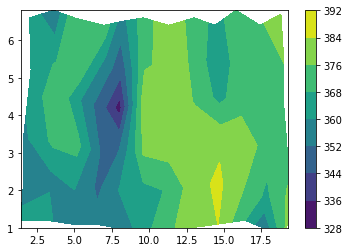

In [145]:
plt.contourf(Xlist[1:7, 1:13], Zlist[1:7, 1:13], sigma_i)
plt.colorbar()

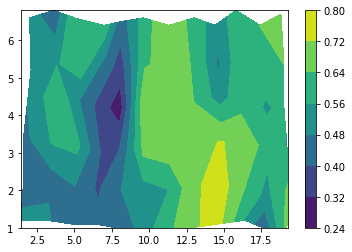

In [146]:
plt.contourf(Xlist[1:7, 1:13], Zlist[1:7, 1:13], E_i)
plt.colorbar()

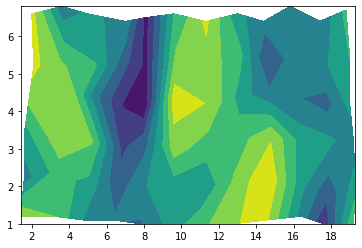

In [147]:
plt.contourf(Xlist[1:7, 1:13], Zlist[1:7, 1:13], E_x)

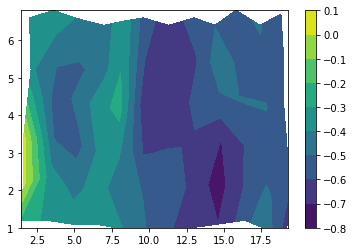

In [148]:
plt.contourf(Xlist[1:7, 1:13], Zlist[1:7, 1:13], E_z)
plt.colorbar()

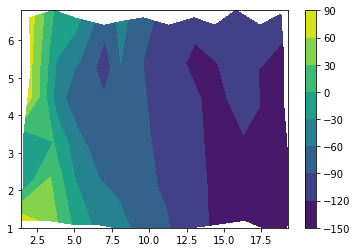

In [150]:
plt.contourf(Xlist[1:7, 1:13], Zlist[1:7, 1:13], sigma_x)
plt.colorbar()

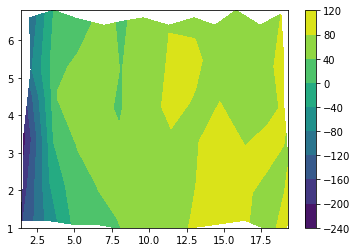

In [151]:
plt.contourf(Xlist[1:7, 1:13], Zlist[1:7, 1:13], sigma_z)
plt.colorbar()